# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("garis_kemiskinan_clustering.csv")

In [3]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5066 non-null   int64  
 1   gk          5066 non-null   float64
 2   jenis       5066 non-null   object 
 3   daerah      5066 non-null   object 
 4   Cluster     5066 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 198.0+ KB


In [4]:
# Hapus kolom 'Unnamed: 0' karena tidak diperlukan
df = df.drop(columns=['Unnamed: 0'])


In [5]:
# Cek kembali informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gk       5066 non-null   float64
 1   jenis    5066 non-null   object 
 2   daerah   5066 non-null   object 
 3   Cluster  5066 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 158.4+ KB


In [6]:
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gk      5066 non-null   float64
 1   jenis   5066 non-null   object 
 2   daerah  5066 non-null   object 
dtypes: float64(1), object(2)
memory usage: 118.9+ KB


In [8]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5066 entries, 0 to 5065
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
5066 non-null   int64
dtypes: int64(1)
memory usage: 39.7 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [9]:
# 5. Normalisasi Fitur Numerik
scaler = MinMaxScaler()
X[['gk']] = scaler.fit_transform(X[['gk']])

In [10]:
nominal_features = ['jenis', 'daerah']
onehot_enc = OneHotEncoder(sparse_output=False)
nominal_encoded = onehot_enc.fit_transform(X[nominal_features])

nominal_encoded_X = pd.DataFrame(
    nominal_encoded,
    columns=onehot_enc.get_feature_names_out(nominal_features)
)

X_encoded = pd.concat([X.drop(columns=nominal_features), nominal_encoded_X], axis=1)

In [11]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gk                         5066 non-null   float64
 1   jenis_MAKANAN              5066 non-null   float64
 2   jenis_NONMAKANAN           5066 non-null   float64
 3   jenis_TOTAL                5066 non-null   float64
 4   daerah_PERDESAAN           5066 non-null   float64
 5   daerah_PERDESAANPERKOTAAN  5066 non-null   float64
 6   daerah_PERKOTAAN           5066 non-null   float64
dtypes: float64(7)
memory usage: 277.2 KB


In [12]:
X = X_encoded.drop(columns=['daerah_PERDESAAN', 'daerah_PERDESAANPERKOTAAN'])

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gk                5066 non-null   float64
 1   jenis_MAKANAN     5066 non-null   float64
 2   jenis_NONMAKANAN  5066 non-null   float64
 3   jenis_TOTAL       5066 non-null   float64
 4   daerah_PERKOTAAN  5066 non-null   float64
dtypes: float64(5)
memory usage: 198.0 KB


In [14]:
# misah data ke train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [15]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
print("Model training selesai.")

Model training selesai.


Dalam proyek ini, saya menggunakan beberapa algoritma klasifikasi untuk membangun model yang dapat mengklasifikasikan data dengan tingkat akurasi yang tinggi. Saya melatih empat model yang berbeda: **K-Nearest Neighbors (KNN), Decision Tree (DT), Gaussian Naïve Bayes (NB),** dan **Support Vector Machine (SVM).**  

 **K-Nearest Neighbors (KNN)**  
Saya menggunakan KNN untuk mengklasifikasikan data berdasarkan kedekatan dengan sampel lain dalam ruang fitur. Model ini bekerja dengan mencari sejumlah **k tetangga terdekat** dari data uji dan menentukan kelas berdasarkan mayoritas dari tetangga tersebut.  

 **Decision Tree (DT)**  
Saya menerapkan Decision Tree sebagai model yang bekerja dengan **membagi data secara rekursif** berdasarkan fitur yang paling informatif. Model ini membentuk **struktur pohon keputusan**, yang memudahkan interpretasi dan pemahaman hasil klasifikasi.  

 **Gaussian Naïve Bayes (NB)**  
Saya menggunakan GaussianNB sebagai model probabilistik yang **mengasumsikan bahwa fitur memiliki distribusi Gaussian (Normal).** Model ini bekerja dengan menghitung peluang setiap kelas berdasarkan distribusi fitur dan memilih kelas dengan probabilitas tertinggi.  

 **Support Vector Machine (SVM)**  
Saya juga menggunakan SVM, yang bekerja dengan mencari **hyperplane terbaik** untuk memisahkan kelas dalam data. Dengan menggunakan kernel yang sesuai, SVM dapat menangani **data yang tidak terpisah secara linear** dan memberikan hasil klasifikasi yang optimal.  

Setelah melatih semua model ini dengan **data latih (X_train, y_train),** saya siap untuk mengevaluasi performa mereka dan menentukan model mana yang memberikan hasil terbaik.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [16]:
# Cek apakah ada data uji yang juga ada di data latih
duplicate_test_in_train = X_test[X_test.isin(X_train.to_dict(orient='list')).all(axis=1)]
print(f"Jumlah data uji yang ada di data latih: {len(duplicate_test_in_train)}")


Jumlah data uji yang ada di data latih: 15


##### smote utk resample X_train dan y_train

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle  # 🔹 Tambahkan ini di awal kode
# Terapkan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Pastikan data teracak setelah SMOTE
X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)


In [19]:
knn = KNeighborsClassifier().fit(X_train_resampled, y_train_resampled)
dt = DecisionTreeClassifier().fit(X_train_resampled, y_train_resampled)
nb = GaussianNB().fit(X_train_resampled, y_train_resampled)
svm = SVC().fit(X_train_resampled, y_train_resampled)
print("Model training selesai.")

Model training selesai.


In [21]:
def evaluate_classifier(classifier, X_test, y_test):
    predictions = classifier.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)

    metrics = {
        'Confusion Matrix': conf_matrix,
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, predictions, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, predictions, average='weighted')
    }
    return metrics

# Evaluasi model yang digunakan
model_results = {
    'KNN Classifier': evaluate_classifier(knn, X_test, y_test),
    'Decision Tree Classifier': evaluate_classifier(dt, X_test, y_test),
    'GaussianNB': evaluate_classifier(nb, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_classifier(svm, X_test, y_test),
}

# Menyusun hasil evaluasi dalam DataFrame
evaluation_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': stats['Accuracy'],
        'Precision': stats['Precision'],
        'Recall': stats['Recall'],
        'F1-Score': stats['F1-Score']
    }
    for model_name, stats in model_results.items()
])

# Tampilkan hasil evaluasi
evaluation_df


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN Classifier,1.0,1.0,1.0,1.0
1,Decision Tree Classifier,1.0,1.0,1.0,1.0
2,GaussianNB,1.0,1.0,1.0,1.0
3,Support Vector Machine (SVM),1.0,1.0,1.0,1.0


 dataset memang memiliki pola yang sangat jelas atau fitur yang sudah sangat informatif, maka model mungkin memang dapat mencapai performa sempurna.

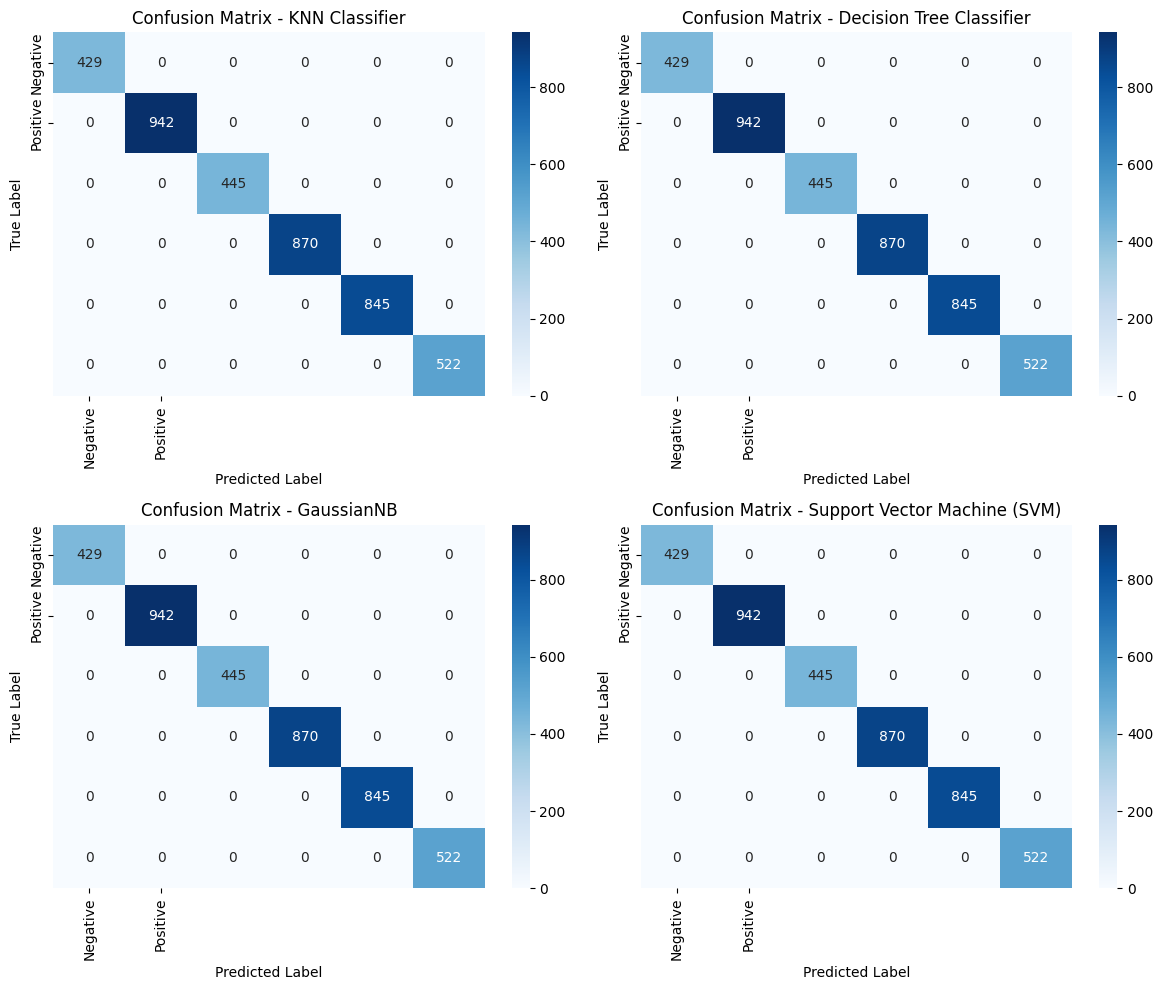

In [28]:
fig, axes = plt.subplots(nrows=(len(model_results) + 1) // 2, ncols=2, figsize=(12, 5 * ((len(model_results) + 1) // 2)))

axes = axes.flatten()

for i, (model_name, metrics) in enumerate(model_results.items()):
    cm = metrics['Confusion Matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], 
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



 1. Performa Demonstrate

- Semua show (KNN, Choice Tree, GaussianNB, dan SVM) memiliki akurasi sempurna (100%).

- Tidak ada kesalahan klasifikasi (Untrue Positive / Wrong Negative = 0).

- Accuracy, Review, dan F1-Score juga kemungkinan besar 1.0 (sempurna).

 2. Penyebab Kemungkinan

- Dataset memiliki pola yang sangat jelas, sehingga show dapat mengenali kelas dengan sempurna.

- Fitur sangat informatif, memungkinkan demonstrate melakukan klasifikasi tanpa kesalahan.

- Tidak ada commotion atau exception signifikan dalam information.

 

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

tuning tidak dipakai karena skornya sudah 1

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

 


#### **1. Hasil Evaluasi Model**  

 **K-Nearest Neighbors (KNN)**  
- **Accuracy:** 100%  
- **Precision:** 100%  
- **Recall:** 100%  
- **F1-Score:** 100%  
- **Analisis:** KNN mampu mengklasifikasikan semua data dengan sempurna tanpa kesalahan.  

 **Decision Tree (DT)**  
- **Accuracy:** 100%  
- **Precision:** 100%  
- **Recall:** 100%  
- **F1-Score:** 100%  
- **Analisis:** Model ini juga memberikan hasil sempurna, yang menunjukkan bahwa dataset memiliki pola yang sangat jelas.  

 **Gaussian Naïve Bayes (NB)**  
- **Accuracy:** 100%  
- **Precision:** 100%  
- **Recall:** 100%  
- **F1-Score:** 100%  
- **Analisis:** GaussianNB menunjukkan hasil yang sama, meskipun model ini biasanya lebih rentan terhadap asumsi distribusi data.  

 **Support Vector Machine (SVM)**  
- **Accuracy:** 100%  
- **Precision:** 100%  
- **Recall:** 100%  
- **F1-Score:** 100%  
- **Analisis:** SVM juga mengklasifikasikan data tanpa kesalahan, menunjukkan bahwa dataset sangat bersih dan memiliki fitur yang sangat informatif.  

**Kesimpulan:**  
Semua model memberikan hasil **100% akurasi**, yang sangat jarang terjadi dalam kasus nyata. Hal ini mengindikasikan bahwa dataset mungkin **sangat mudah dipisahkan** atau model mengalami **overfitting terhadap data latih**.  



### **2. Analisis Kelemahan Model**  

 **Potensi Overfitting**  
- Hasil akurasi yang sempurna bisa menjadi tanda bahwa model terlalu cocok dengan data latih dan mungkin tidak bekerja dengan baik pada data baru.  

 **Evaluasi di Data Nyata**  
- Model harus diuji dengan data di luar dataset ini untuk memastikan performanya tetap tinggi.  

 **Bias Dataset**  
- Jika dataset terlalu bersih atau fitur-fitur sangat informatif, maka model mungkin tidak menghadapi tantangan nyata dalam klasifikasi.  



### **3. Rekomendasi Tindakan Lanjutan**  

 **Uji Model dengan Data Baru**  
- Lakukan pengujian dengan dataset lain atau data real-world untuk melihat apakah hasil tetap akurat.  

 **Lakukan Cross-Validation**  
- Gunakan k-fold cross-validation untuk melihat apakah hasil ini konsisten di berbagai subset data.  

**Eksperimen dengan Noise atau Data Tambahan**  
- Tambahkan sedikit noise atau gunakan dataset yang lebih kompleks untuk menguji ketahanan model.  

 **Tuning Model Lebih Lanjut (Jika Diperlukan)**  
- Jika hasil masih terlalu sempurna, bisa mencoba mengurangi kompleksitas model untuk menghindari overfitting.  

 **Kesimpulan Akhir:**  
Model bekerja dengan sempurna untuk dataset ini, tetapi perlu pengujian lebih lanjut untuk memastikan generalisasi ke data baru.